In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("weather.csv")

In [3]:
all_df=all_df.drop(['RISK_MM'], axis=1)

In [4]:
X=all_df.drop(['RainTomorrow'], axis=1).values.astype('float64')

In [5]:
Y = all_df['RainTomorrow'].values.astype('int64')

In [6]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [8]:
model = Sequential()

In [9]:
model.add(Dense(units=39*5,   input_dim=13,
                kernel_initializer='uniform', 
                activation='relu'))

In [10]:
model.add(Dense(units=39*4,   
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=39*3,   
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=39*2,   
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=39,   
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 195)               2730      
_________________________________________________________________
dense_2 (Dense)              (None, 156)               30576     
_________________________________________________________________
dense_3 (Dense)              (None, 117)               18369     
_________________________________________________________________
dense_4 (Dense)              (None, 78)                9204      
_________________________________________________________________
dense_5 (Dense)              (None, 39)                3081      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 40        
Total params: 64,000
Trainable params: 64,000
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 86104 samples, validate on 9568 samples
Epoch 1/30
86104/86104 [==============================] - 5s 55us/step - loss: 0.5269 - acc: 0.7762 - val_loss: 0.4048 - val_acc: 0.7774
Epoch 2/30
86104/86104 [==============================] - 3s 33us/step - loss: 0.3730 - acc: 0.8293 - val_loss: 0.3636 - val_acc: 0.8438
Epoch 3/30
86104/86104 [==============================] - 4s 44us/step - loss: 0.3459 - acc: 0.8537 - val_loss: 0.3602 - val_acc: 0.8436
Epoch 4/30
86104/86104 [==============================] - 3s 30us/step - loss: 0.3428 - acc: 0.8540 - val_loss: 0.3531 - val_acc: 0.8468
Epoch 5/30
86104/86104 [==============================] - 3s 32us/step - loss: 0.3400 - acc: 0.8553 - val_loss: 0.3512 - val_acc: 0.8515
Epoch 6/30
86104/86104 [==============================] - 2s 28us/step - loss: 0.3381 - acc: 0.8556 - val_loss: 0.3481 - val_acc: 0.8511
Epoch 7/30
86104/86104 [==============================] - 2s 28us/step - loss: 0.3368 - acc: 0.8566 - val_loss: 0.3475 - val_acc:

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

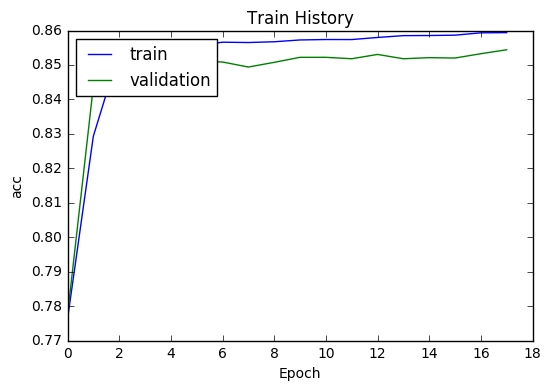

In [19]:
show_train_history(train_history,'acc','val_acc')

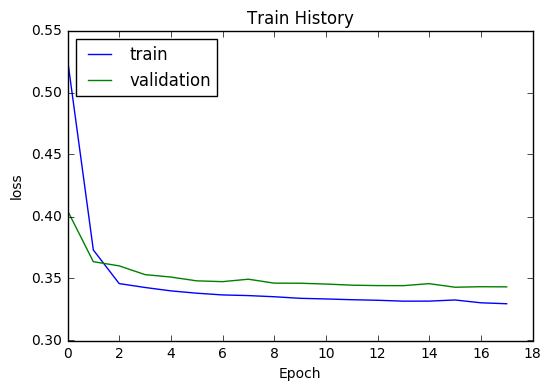

In [20]:
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

23918/23918 [==============================] - 1s 40us/step


In [22]:
scores[1]

0.8567187891964211